In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head()	


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [2]:
#chipotle_data.info()
print(chipotle_data.columns.tolist())


['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [3]:
#highest = chipotle_data.idxmax()
#print(chipotle_data.max(axis = 'columns'))


max_quantity = chipotle_data['quantity'].max()
print(f"Max quantity: {max_quantity}")

highest_name = chipotle_data.loc[max_quantity, 'item_name']
print(highest_name)


Max quantity: 15
Chips and Tomatillo-Green Chili Salsa


In [4]:
totalRevenues = 0.0
for index, row in chipotle_data.iterrows():
    totalRevenues += (float(row['item_price'].strip('$')) * float(row['quantity']))

print(f"${round(totalRevenues, 2)}")

$39237.02


In [5]:
totalAmount = 0
for index, row in chipotle_data.iterrows():
    totalAmount += (row['quantity'])

print(totalAmount)

4972


In [6]:
overTen = 0
for index, row in chipotle_data.iterrows():
    if(float(row['item_price'].strip('$')) > 10):
        overTen += 1
    
print(overTen)

1130


In [7]:
uniqueNames = set(chipotle_data['item_name'])
print(uniqueNames)

{'Steak Salad Bowl', 'Steak Salad', 'Chips and Tomatillo-Red Chili Salsa', 'Chips', 'Chicken Salad Bowl', 'Barbacoa Crispy Tacos', 'Veggie Burrito', 'Chips and Roasted Chili-Corn Salsa', 'Carnitas Salad Bowl', 'Chips and Fresh Tomato Salsa', 'Steak Soft Tacos', 'Carnitas Bowl', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chicken Salad', 'Barbacoa Soft Tacos', 'Carnitas Salad', '6 Pack Soft Drink', 'Barbacoa Salad Bowl', 'Veggie Salad', 'Veggie Crispy Tacos', 'Side of Chips', 'Canned Soda', 'Chips and Roasted Chili Corn Salsa', 'Nantucket Nectar', 'Veggie Bowl', 'Canned Soft Drink', 'Carnitas Crispy Tacos', 'Steak Crispy Tacos', 'Carnitas Soft Tacos', 'Veggie Salad Bowl', 'Steak Burrito', 'Burrito', 'Chicken Burrito', 'Chicken Bowl', 'Carnitas Burrito', 'Salad', 'Bottled Water', 'Chicken Soft Tacos', 'Steak Bowl', 'Chips and Mild Fresh Tomato Salsa', 'Izze', 'Veggie Soft Tacos', 'Chicken Crispy Tacos', 'Bowl', 'Crispy Tacos', 'Barbacoa Bowl', 'Chip

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


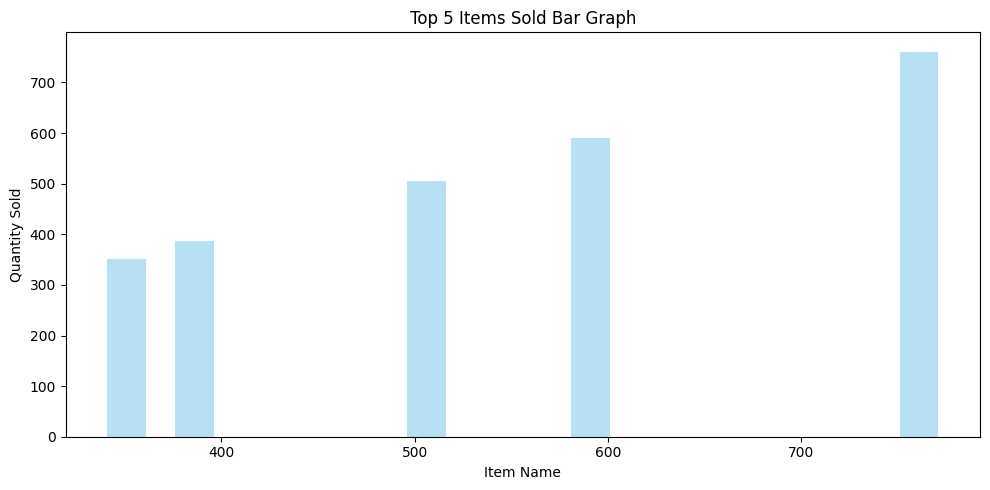

In [8]:
items = chipotle_data.groupby('item_name')['quantity'].sum()
fiveHighestItems = items.sort_values(ascending=False)
fiveHighest = fiveHighestItems.head()
print(fiveHighest)
name = fiveHighest.to_numpy()
quantity = fiveHighest.to_numpy()

#y-axis quantity
#x-axis item_name
plt.figure(figsize = (10, 5))
#plt.bar(fiveHighest['item_name'], fiveHighest['max_quantity'], color='blue', width = 0.4)
plt.bar(name, quantity, color='skyblue', width = 20, alpha = 0.6)

plt.title("Top 5 Items Sold Bar Graph")
plt.xlabel("Item Name")
plt.ylabel("Quantity Sold")
plt.tight_layout()

plt.show()


item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64


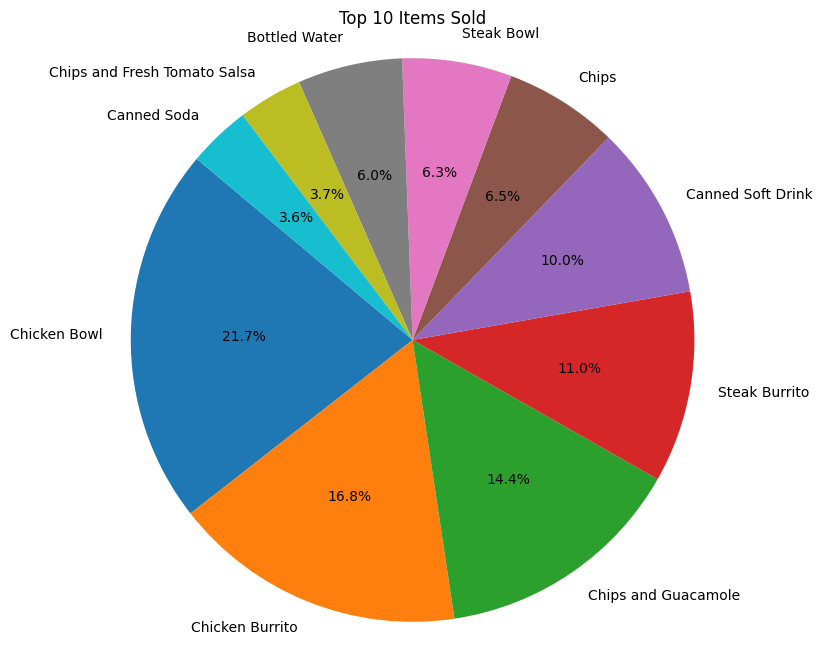

In [18]:
items = chipotle_data.groupby('item_name')['quantity'].sum()
tenHighestItems = items.sort_values(ascending=False)
tenHighestItems = tenHighestItems.head(10)
print(tenHighestItems)


plt.figure(figsize=(8,8))
plt.pie(tenHighestItems, labels=tenHighestItems.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Items Sold')
plt.show()
